In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd ..

/Users/rubenbroekx/Documents/Projects/SemiSupervisedClustering


# Demo - Default Usage

**Demo: Explain the package, as well as this demo**

In [3]:
import re
import json
import matplotlib.pyplot as plt
import tensorflow as tf

from glob import glob
from tqdm import tqdm
from pathlib import Path
from collections import Counter

from semi_supervised_clustering import EmbeddingModel

## Data

In [4]:
# Consider only the profiles scraped from LinkedIn
DATA_PATH = Path.cwd() / 'demos/demo_data.json'

# Name assigned to the clustering-model
name = 'demo_default'

In [5]:
def clean_f(x:str) -> str:
    """Cleaning function of the raw text."""
    x = x.lower()
    return re.sub('\W+', ' ', x).strip()

In [6]:
# Load in the data, and clean
with open(DATA_PATH, 'r') as f:
    data = json.load(f)

In [7]:
data_clean = [clean_f(s) for s in data]
data_unique = sorted(set(data_clean))
print(f"Total of {len(data_clean)} data samples")
data_count = [(k, v) for k, v in sorted(Counter(data_clean).items(), key=lambda x: x[1])]
print(f" --> {len(data_count)} unique")

print(f"\n10 most frequent samples:")
for sample, count in list(reversed(data_count))[:10]:
    print(f" - {sample} ({count})")

Total of 4202 data samples
 --> 899 unique

10 most frequent samples:
 - ku leuven (358)
 - katholieke universiteit leuven (290)
 - universiteit gent (263)
 - hogeschool gent (238)
 - vrije universiteit brussel (127)
 - université catholique de louvain (98)
 - universiteit antwerpen (89)
 - groep t internationale hogeschool leuven (83)
 - hogeschool antwerpen (82)
 - kuleuven (78)


Analyse on frequency:
 - Sample frequency >=  0  --> 100% of all samples (899 samples in total)
 - Sample frequency >= 50  -->  46% of all samples (14 samples in total)
 - Sample frequency >= 100 -->  30% of all samples (5 samples in total)
 - Sample frequency >= 150 -->  27% of all samples (4 samples in total)
 - Sample frequency >= 200 -->  27% of all samples (4 samples in total)
 - Sample frequency >= 250 -->  22% of all samples (3 samples in total)
 - Sample frequency >= 300 -->   9% of all samples (1 samples in total)
 - Sample frequency >= 350 -->   9% of all samples (1 samples in total)


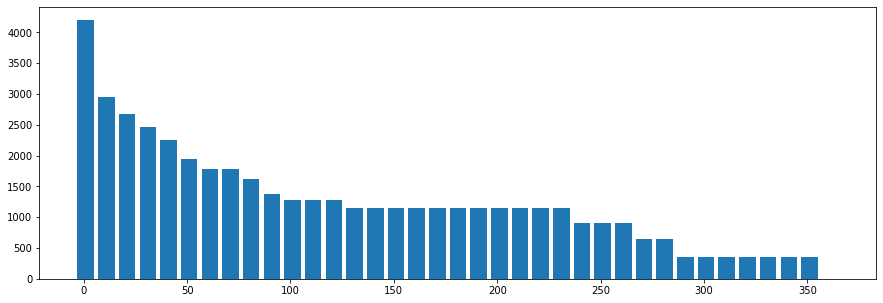

In [8]:
# Plot frequency of the data
counts = sorted([x for k,x in data_count], reverse=True)
x, y = [], []
for i in range(1, max(counts)+10, 10):
    x.append(i)
    y.append(sum(c for c in counts if i <= c))

print(f"Analyse on frequency:")
for freq in range(0,max(counts),50):
    print(f" - Sample frequency >= {freq:^3d} --> {round(100*sum(c for c in counts if freq <= c)/sum(counts)):3d}% of all samples ({len([c for c in counts if freq <= c])} samples in total)")

plt.figure(figsize=(15,5))
plt.bar(x, y, width=8)
plt.show()

## Model

**TODO: Say a word about the model**

### Initialise

**TODO: Explain model creation**

In [9]:
model = EmbeddingModel(
    name=name,
    path_model=Path.cwd() / 'demos/models/default_usage',
    path_data=Path.cwd() / 'demos/data/default_usage',
    clean_f=clean_f,
    vocab_size=200,
    model_layers=(50,50,),
    normalise=True,
    attention=False,
)

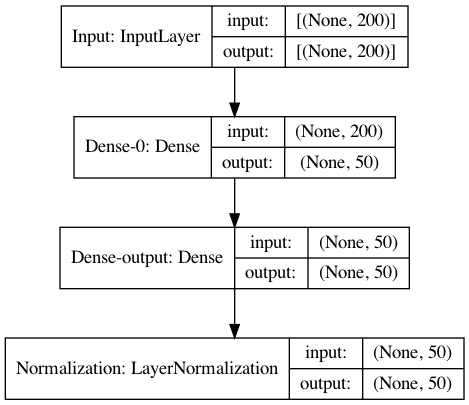

In [10]:
# Plot the model's architecture
tf.keras.utils.plot_model(
        model.embedder._model, Path.cwd() / f"demos/models/default_usage/{model.embedder}.png",
        show_shapes=True,
)

In [11]:
# Create some initial clusters
model.initialise_models(
    data=data,
    reset=True,
    n_min_clusters=0,
)



Analysing encoder 'encoder-demo_default-bpe-200'

Analysing word 'ku leuven':
 --> Encoding: [45, 18]
 --> Word by word:
     - 45: ku
     - 18: leuven

Analysing word 'katholieke universiteit leuven':
 --> Encoding: [58, 32, 18]
 --> Word by word:
     - 58: katholieke
     - 32: universiteit
     - 18: leuven

Analysing word 'universiteit gent':
 --> Encoding: [32, 26]
 --> Word by word:
     - 32: universiteit
     - 26: gent

Analysing word 'hogeschool gent':
 --> Encoding: [34, 26]
 --> Word by word:
     - 34: hogeschool
     - 26: gent

Analysing word 'vrije universiteit brussel':
 --> Encoding: [109, 32, 54]
 --> Word by word:
     - 109: vrije
     - 32: universiteit
     - 54: brussel

Encoding the alphabet:
 - a = [35] = a
 - b = [44] = b
 - c = [60] = c
 - d = [176, 193] = d
 - e = [176, 175] = e
 - f = [127] = f
 - g = [10] = g
 - h = [69] = h
 - i = [68] = i
 - j = [176, 198] = j
 - k = [9] = k
 - l = [7] = l
 - m = [61] = m
 - n = [176, 177] = n
 - o = [90] = o
 - p =

In [12]:
# Add training data manually
model.clusterer.add_clusters({
    'Catholic University of Leuven': ['KULeuven', 'Leuven Groep T'],
    'Free University of Brussels': ['VUB', 'Universiteit Brussel'],
    'University of Ghent': ['Universiteit Gent'],
    None: ['hogeschool gent','hogeschool antwerpen','bme gent']
})

In [13]:
# Add validation data manually
model.clusterer.add_validation({
    'Catholic University of Leuven': ['Louvain-la-Neuve', 'Groep T'],
    'Free University of Brussels': ['Vrije Universiteit Brussel', 'VU Brussel'],
    'University of Ghent': ['UGent', 'Université de Gand'],
    None: ['kaho sint lieven gent','hogent']
})

In [15]:
# Validate the non-trained model's performance
model.clusterer.set_centroids(
    items=data_unique,
    embeddings=model.embed(data_unique),
)
_ = model.validate()


Validation result:
 - Accuracy: 25.0% (2/8)
 - Clustered: 0.0% (0/8)
 - Unclustered: 100.0% (8/8)
 - Incorrectly clustered: 0.0% (0/8)


## Training

**TODO: Explain model  training**

In [18]:
tf.get_logger().setLevel('ERROR')
model.train(
    data=data_clean,
    epochs=5,
    iterations=16,
    n_replaces=20,
)

Loss ???:   0%|          | 0/16 [00:00<?, ?it/s]

==> Running epoch 1 <==


Loss 0.04892: 100%|██████████| 16/16 [00:13<00:00,  1.15it/s]



Training-clustering overview:
 - Unclustered: 81.65% (734/899)
 - Largest cluster: 145
 - Average cluster: 23.571428571428573
 - Largest cluster: 1

Validation result:
 - Accuracy: 37.5% (3/8)
 - Clustered: 12.5% (1/8)
 - Unclustered: 87.5% (7/8)
 - Incorrectly clustered: 0.0% (0/8)

Add to cluster? (sim: 0.9440000057220459)
 -    Item: 'denayer'
 - Cluster: 'Catholic University of Leuven'
Add:a, Help:h, Garbage:g, Ignore:i, Add to other/new cluster:<other>
a
 --> Added to cluster 'Catholic University of Leuven'

Add to cluster? (sim: 0.5389999747276306)
 -    Item: 'katholieke hogeschool gent'
 - Cluster: 'Catholic University of Leuven'
Add:a, Help:h, Garbage:g, Ignore:i, Add to other/new cluster:<other>
g
 --> Added as garbage

Add to cluster? (sim: 0.8980000019073486)
 -    Item: 'ka2 de ring leuven'
 - Cluster: 'Catholic University of Leuven'
Add:a, Help:h, Garbage:g, Ignore:i, Add to other/new cluster:<other>
g
 --> Added as garbage

Add to cluster? (sim: 0.6890000104904175)
 -  

Loss ???:   0%|          | 0/16 [00:00<?, ?it/s]

 --> Added to cluster 'University of Hasselt'


Cluster overview:
 - Total of 7 clusters
 - Average number of cluster-labels: 11.43
==> Running epoch 2 <==


Loss 0.04002: 100%|██████████| 16/16 [00:13<00:00,  1.16it/s]



Training-clustering overview:
 - Unclustered: 82.42% (741/899)
 - Largest cluster: 130
 - Average cluster: 22.571428571428573
 - Largest cluster: 2

Validation result:
 - Accuracy: 37.5% (3/8)
 - Clustered: 12.5% (1/8)
 - Unclustered: 87.5% (7/8)
 - Incorrectly clustered: 0.0% (0/8)
Skip kaho sint lieven gent

Add to cluster? (sim: 0.8669999837875366)
 -    Item: 'thomas more ku leuven'
 - Cluster: 'Catholic University of Leuven'
Add:a, Help:h, Garbage:g, Ignore:i, Add to other/new cluster:<other>
a
 --> Added to cluster 'Catholic University of Leuven'

Add to cluster? (sim: 0.8320000171661377)
 -    Item: 'khleuven'
 - Cluster: 'Catholic University of Leuven'
Add:a, Help:h, Garbage:g, Ignore:i, Add to other/new cluster:<other>
g
 --> Added as garbage

Add to cluster? (sim: 0.29899999499320984)
 -    Item: 'xaverius college antwerpen'
 - Cluster: 'Solvay Business School'
Add:a, Help:h, Garbage:g, Ignore:i, Add to other/new cluster:<other>
g
 --> Added as garbage

Add to cluster? (sim:

Loss ???:   0%|          | 0/16 [00:00<?, ?it/s]

 --> Added as garbage
Skip ugent


Cluster overview:
 - Total of 8 clusters
 - Average number of cluster-labels: 11.25
==> Running epoch 3 <==


Loss 0.04481: 100%|██████████| 16/16 [00:14<00:00,  1.11it/s]



Training-clustering overview:
 - Unclustered: 78.75% (708/899)
 - Largest cluster: 158
 - Average cluster: 23.875
 - Largest cluster: 2

Validation result:
 - Accuracy: 50.0% (4/8)
 - Clustered: 25.0% (2/8)
 - Unclustered: 75.0% (6/8)
 - Incorrectly clustered: 0.0% (0/8)

Add to cluster? (sim: 0.9800000190734863)
 -    Item: 'groept leuven'
 - Cluster: 'Catholic University of Leuven'
Add:a, Help:h, Garbage:g, Ignore:i, Add to other/new cluster:<other>
a
 --> Added to cluster 'Catholic University of Leuven'

Add to cluster? (sim: 0.9539999961853027)
 -    Item: 'ecole polytechnique de louvain uclouvain'
 - Cluster: 'Catholic University of Leuven'
Add:a, Help:h, Garbage:g, Ignore:i, Add to other/new cluster:<other>
a
 --> Added to cluster 'Catholic University of Leuven'

Add to cluster? (sim: 0.9869999885559082)
 -    Item: 'ucl louvain la neuve'
 - Cluster: 'Catholic University of Leuven'
Add:a, Help:h, Garbage:g, Ignore:i, Add to other/new cluster:<other>
a
 --> Added to cluster 'Cath

Loss ???:   0%|          | 0/16 [00:00<?, ?it/s]

 --> Added as garbage


Cluster overview:
 - Total of 8 clusters
 - Average number of cluster-labels: 12.5
==> Running epoch 4 <==


Loss 0.03935: 100%|██████████| 16/16 [00:14<00:00,  1.07it/s]



Training-clustering overview:
 - Unclustered: 76.86% (691/899)
 - Largest cluster: 168
 - Average cluster: 26.0
 - Largest cluster: 2

Validation result:
 - Accuracy: 50.0% (4/8)
 - Clustered: 37.5% (3/8)
 - Unclustered: 62.5% (5/8)
 - Incorrectly clustered: 12.5% (1/8)

Add to cluster? (sim: 0.8799999952316284)
 -    Item: 'royal conservatory brussels'
 - Cluster: 'Catholic University of Leuven'
Add:a, Help:h, Garbage:g, Ignore:i, Add to other/new cluster:<other>
g
 --> Added as garbage

Add to cluster? (sim: 0.2770000100135803)
 -    Item: 'cvo step hasselt'
 - Cluster: 'University of Hasselt'
Add:a, Help:h, Garbage:g, Ignore:i, Add to other/new cluster:<other>
g
 --> Added as garbage
Skip vrije universiteit brussel
Skip kaho sint lieven gent

Add to cluster? (sim: 0.5889999866485596)
 -    Item: 'syntra brussel'
 - Cluster: 'Free University of Brussels'
Add:a, Help:h, Garbage:g, Ignore:i, Add to other/new cluster:<other>
g
 --> Added as garbage

Add to cluster? (sim: 0.730000019073

Loss ???:   0%|          | 0/16 [00:00<?, ?it/s]

 --> Added as garbage


Cluster overview:
 - Total of 8 clusters
 - Average number of cluster-labels: 13.62
==> Running epoch 5 <==


Loss 0.03211: 100%|██████████| 16/16 [00:15<00:00,  1.04it/s]



Training-clustering overview:
 - Unclustered: 75.19% (676/899)
 - Largest cluster: 179
 - Average cluster: 27.875
 - Largest cluster: 2

Validation result:
 - Accuracy: 50.0% (4/8)
 - Clustered: 37.5% (3/8)
 - Unclustered: 62.5% (5/8)
 - Incorrectly clustered: 12.5% (1/8)


In [19]:
model.validate()


Validation result:
 - Accuracy: 50.0% (4/8)
 - Clustered: 37.5% (3/8)
 - Unclustered: 62.5% (5/8)
 - Incorrectly clustered: 12.5% (1/8)


[('louvain la neuve',
  'Catholic University of Leuven',
  'Catholic University of Leuven'),
 ('groep t', 'Catholic University of Leuven', 'Catholic University of Leuven'),
 ('vrije universiteit brussel', 'Free University of Brussels', None),
 ('vu brussel', 'Free University of Brussels', None),
 ('ugent', 'University of Ghent', None),
 ('université de gand',
  'University of Ghent',
  'Catholic University of Leuven'),
 ('kaho sint lieven gent', None, None),
 ('hogent', None, None)]

## Visualise result

**TODO: Explain**

In [47]:
model.visualise_tensorboard(
    data=data_unique,
    path_projector=Path.cwd() / 'demos/projector/default_usage'
)

Run tensorboard in terminal:
tensorboard --logdir /Users/rubenbroekx/Documents/Projects/SemiSupervisedClustering/demos/projector/default_usage/demo_default

Or run tensorboard in notebook:
%load_ext tensorboard
%tensorboard --logdir /Users/rubenbroekx/Documents/Projects/SemiSupervisedClustering/demos/projector/default_usage/demo_default
